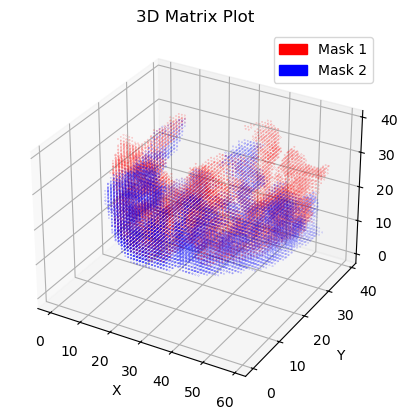

In [69]:
import nibabel as nb
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from matplotlib.animation import FuncAnimation
roi = nb.load('/root/autodl-tmp/NSD/nsddata_betas/ppdata/subj01/nsdgeneral.nii.gz')
mask1 = roi.get_fdata()==1
mask1 = mask1[12:72,:40,20:80]

# roi = nb.load('/root/autodl-tmp/NSD/nsddata_betas/ppdata/subj02/roi_mask/nsdgeneral.nii.gz')
# mask2 = roi.get_fdata()==1
# mask2 = mask2[12:72,:40,20:60]


# 创建图形和轴
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 获取矩阵的形状
x, y, z = np.indices(mask1.shape)

reds = [(1,0,0,c) for c in np.linspace(0,1,100)]
cmapred = mcolors.LinearSegmentedColormap.from_list('mycmap', reds, N=100)
# blues = [(0,0,1,c) for c in np.linspace(0,1,100)]
# cmapblue = mcolors.LinearSegmentedColormap.from_list('mycmap', blues, N=100)
# 绘制3D矩阵
ax.scatter(x.flatten(), y.flatten(), z.flatten(), c=mask1.flatten(), s=0.02,cmap = cmapred)
# ax.scatter(x.flatten(), y.flatten(), z.flatten(), c=mask2.flatten(), s=0.02,cmap = cmapblue)

# 设置图形属性
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Matrix Plot')

import matplotlib.patches as mpatches
# 创建一个假的图例
red_patch = mpatches.Patch(color='red', label='Mask 1')
# blue_patch = mpatches.Patch(color='blue', label='Mask 2')

# 将假的图例添加到图中
plt.legend(handles=[red_patch, blue_patch])

plt.show()

In [31]:
from matplotlib import animation 
from matplotlib.animation import FuncAnimation

def update(frame):
    ax.view_init(azim=frame)
ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 36), interval=50)
writergif = animation.PillowWriter(fps=5)
ani.save('test.gif', writer=writergif)

In [18]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


In [ ]:
ckpt = torch.load('/root/autodl-tmp/fMRI/train_logs/multisubject_subj1_session1_991/last.pth', map_location='cpu')
ori_data=ckpt['model_state_dict']['voxel2clip.mask']


In [10]:
data = (ori_data)>0.5

In [1]:
import nibabel as nb
roi = nb.load('/root/autodl-tmp/NSD/nsddata_betas/ppdata/subj01/nsdgeneral.nii.gz')
ori_mask = roi.get_fdata()==1


In [2]:
# mask = ori_mask[12:72,:50,20:70] # 尽量保存体素
mask = ori_mask[12:72,:40,20:60] # 丢失了一些体素

In [16]:
print(ori_mask.shape)
print((ori_mask[ori_mask]).shape)
print(mask.shape)
print((mask[mask]).shape)


(79, 97, 78)
(13039,)
(60, 40, 40)
(12817,)


In [3]:
import numpy as np
data = np.load('/root/autodl-tmp/fMRI/train_logs/subj05_3000_1sess.npy')
data = data.reshape((60,40,40))

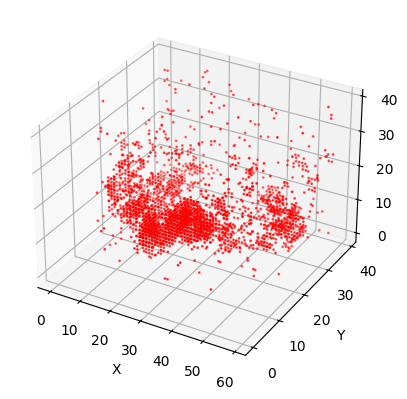

In [4]:

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
# 创建图形和轴
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 获取矩阵的形状
x, y, z = np.indices(data.shape)
# mx,my,mz = np.indices(mask.shape)

reds = [(1,0,0,c) for c in np.linspace(0,1,100)]
cmapred = mcolors.LinearSegmentedColormap.from_list('mycmap', reds, N=100)
blues = [(0,0,1,c) for c in np.linspace(0,1,100)]
cmapblue = mcolors.LinearSegmentedColormap.from_list('mycmap', blues, N=100)
# 绘制3D矩阵
ax.scatter(x.flatten(), y.flatten(), z.flatten(), c=data.flatten(), s=1,cmap = cmapred)
# ax.scatter(mx.flatten(), my.flatten(), mz.flatten(), c=mask.flatten(), s=0.02,cmap = cmapblue)

# 设置图形属性
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# ax.set_title('3D Matrix Plot')
# ax.view_init(elev=0,azim=0)

import matplotlib.patches as mpatches
# 创建一个假的图例
# red_patch = mpatches.Patch(color='red', label='trainable roi mask')
# blue_patch = mpatches.Patch(color='blue', label='Mask 1')

# 将假的图例添加到图中
# plt.legend(handles=[red_patch])
# plt.savefig('/root/autodl-tmp/fMRI/1000_1session.png',dpi=200)
plt.show()

In [11]:
import numpy as np
from scipy.ndimage import convolve

# 创建一个 60x60x40 的随机矩阵
input_matrix = np.ones((60,40,40))*data

# 创建一个 6x6x4 的全1卷积核
kernel = np.ones((3, 3, 3))

# 计算需要的填充
padding = ((1, 1), (1, 1), (1, 1))  # 对应每个维度的填充 (高度, 宽度, 深度)

# 对输入矩阵进行填充
padded_matrix = np.pad(input_matrix, padding, mode='constant', constant_values=0)

# 进行卷积操作
output_matrix = convolve(input_matrix, kernel, mode='constant', cval=0.0)

# 裁剪掉填充后的多余部分，保持与原输入尺寸一致
# output_matrix = output_matrix[2:-2, 2:-2, 1:-1]

print(output_matrix.shape)
# # 输出矩阵的形状
# print("输出矩阵的形状:", (output_matrix>4).sum())
output = (output_matrix>4)*data
# output = output_matrix
print("输出矩阵的形状:", (output).sum())


(60, 40, 40)
输出矩阵的形状: 1978


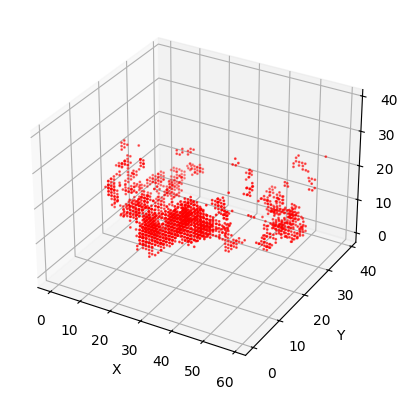

In [12]:

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
# 创建图形和轴
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 获取矩阵的形状
x, y, z = np.indices(output.shape)
# mx,my,mz = np.indices(mask.shape)

reds = [(1,0,0,c) for c in np.linspace(0,1,100)]
cmapred = mcolors.LinearSegmentedColormap.from_list('mycmap', reds, N=100)
blues = [(0,0,1,c) for c in np.linspace(0,1,100)]
cmapblue = mcolors.LinearSegmentedColormap.from_list('mycmap', blues, N=100)
# 绘制3D矩阵
ax.scatter(x.flatten(), y.flatten(), z.flatten(), c=output.flatten(), s=1,cmap = cmapred)
# ax.scatter(mx.flatten(), my.flatten(), mz.flatten(), c=mask.flatten(), s=0.02,cmap = cmapblue)

# 设置图形属性
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# ax.set_title('3D Matrix Plot')
# ax.view_init(elev=0,azim=0)

import matplotlib.patches as mpatches
# 创建一个假的图例
# red_patch = mpatches.Patch(color='red', label='trainable roi mask')
# blue_patch = mpatches.Patch(color='blue', label='Mask 1')

# 将假的图例添加到图中
# plt.legend(handles=[red_patch])
# plt.savefig('/root/autodl-tmp/fMRI/1000_1session.png',dpi=200)
plt.show()

In [13]:
np.save('/root/autodl-tmp/fMRI/train_logs/conv_subj05_1978_1sess.npy',output)

In [42]:
data.sum()

2961

In [39]:
data.sum()

2961

In [8]:
ori_data.max()

tensor(0.9655)

In [15]:
ori_data.min()

tensor(-0.0532)

In [66]:
(ori_data).sum()

tensor(677.6160)

In [82]:
(torch.sigmoid(ori_data)>0.46).sum()

tensor(2581)

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
ckpt = torch.load('/root/autodl-tmp/fMRI/train_logs/subj05_2000_128/last.pth', map_location='cpu')
ori_data=ckpt['model_state_dict']['voxel2clip.mask']
tiny_roi = ((ori_data)>0.5)
indim = len(tiny_roi[tiny_roi])


In [7]:
import numpy as np
s=1
f = np.load(f'/root/autodl-tmp/NSD/nsddata_betas/ppdata/subj0{s}/subj0{s}_fmri_resize.npy',mmap_mode='r')

In [23]:
mask = (abs(f[0])>0.01)

In [2]:
import torch
##### sample prediction
model_zoe_n = torch.hub.load("isl-org/ZoeDepth", "ZoeD_N", pretrained=True)
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
zoe = model_zoe_n.to(DEVICE)


# Local file
from PIL import Image
image = Image.open("cat.png").convert("RGB")# load
from torchvision.transforms import Compose, Normalize, Resize, ToTensor, ToPILImage



Using cache found in /root/.cache/torch/hub/isl-org_ZoeDepth_main


img_size [384, 512]


Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master
/root/miniconda3/envs/mindeye/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/root/miniconda3/envs/mindeye/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Params passed to Resize transform:
	width:  512
	height:  384
	resize_target:  True
	keep_aspect_ratio:  True
	ensure_multiple_of:  32
	resize_method:  minimal
Using pretrained resource url::https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_N.pt
Loaded successfully


In [6]:
transform = Compose([
    Resize(64),
    # ToTensor(),
    # Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
img = transform(image)[None,:].to(DEVICE)
print(img.shape)
depth_map = zoe.infer(img)  # as numpy

torch.Size([1, 3, 256, 256])


In [4]:
depth_map[0,0,:,:].shape

torch.Size([256, 256])

In [12]:
depth_map_pil = zoe.infer_pil(Resize(224)(image))

In [13]:
from zoedepth.utils.misc import colorize

colored = colorize(depth_map_pil)

# save colored output
fpath_colored = "depth_colored_cat.png"
Image.fromarray(colored).save(fpath_colored)

In [1]:
from models import fmriNet
import torch
# model_zoe_n = torch.hub.load("isl-org/ZoeDepth", "ZoeD_N", pretrained=True)
# DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
# zoe = model_zoe_n.to(DEVICE)
model = fmriNet(out_dim=768*257, in_dim=96000, clip_size=768, h=1024, n_blocks=4, norm_type='ln',
                 act_first=False,
                 use_depth=True,
                 trainable_roi =True,
                 w=1e-4)
model = model.to('cuda')
x = torch.ones((128,60,40,40)).cuda()
clip,depth,l1loss = model(x)


/root/miniconda3/envs/mindeye/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
depth.shape

torch.Size([128, 1, 64, 64])

# 接下来是输入层尺寸的缩小

In [1]:
import torch
import torch.nn as nn
ckpt = torch.load('/root/autodl-tmp/fMRI/train_logs/subj05_2000_128/last.pth', map_location='cpu')

# large_linear_layer = ckpt['model_state_dict']['voxel2clip.lin0.0.weight']



# 假设 active_indices 是包含 2000 个有值位置的索引
ori_data=ckpt['model_state_dict']['voxel2clip.mask']
tiny_roi = ((ori_data)>0.5)
active_indices = tiny_roi.flatten(0)

# 提取大线性层的权重和偏置项
weight = ckpt['model_state_dict']['voxel2clip.lin0.0.weight']
bias = ckpt['model_state_dict']['voxel2clip.lin0.0.bias']

# 选择与 active_indices 对应的权重
selected_weight = weight[:, active_indices]

# 创建新的线性层
small_linear_layer = nn.Linear(2000, 1024)

# 将提取的权重和偏置项赋给新的线性层
with torch.no_grad():
    small_linear_layer.weight = nn.Parameter(selected_weight)
    small_linear_layer.bias = nn.Parameter(bias)
    


In [2]:
# 保存成新的模型并进行测试
import models
sub_model_state_dict = {k.replace('voxel2clip.', ''): v for k, v in ckpt['model_state_dict'].items() if 'voxel2clip' in k} 
model=models.fmriNet(trainable_roi=False)
model.load_state_dict(sub_model_state_dict,strict=False)
# model.lin0[0] = small_linear_layer

/root/miniconda3/envs/mindeye/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<All keys matched successfully>

In [4]:
data = torch.rand((32,60,40,40))
x = data*model.mask
x = x.reshape(x.shape[0], -1)
model.lin0[0](x)

tensor([[-0.0917,  0.4378, -0.2357,  ...,  1.2032, -0.2973, -0.2961],
        [ 0.0648,  1.0379, -0.2290,  ...,  1.3556,  0.3247,  0.0452],
        [-0.2750,  0.0364,  0.3418,  ...,  1.3954,  0.2660, -0.2929],
        ...,
        [-0.0104,  0.8786, -0.0079,  ...,  0.9547, -0.5600,  0.5883],
        [ 0.0947,  0.5822, -0.2302,  ...,  1.0736,  0.3017, -0.1971],
        [-0.2529,  0.0613,  0.1412,  ...,  0.8935,  0.0261,  0.5876]],
       grad_fn=<AddmmBackward0>)

In [5]:
y = (data*model.mask)[:,tiny_roi]
small_linear_layer(y)

tensor([[-0.0922,  0.4377, -0.2355,  ...,  1.2030, -0.2961, -0.2962],
        [ 0.0645,  1.0378, -0.2289,  ...,  1.3554,  0.3259,  0.0452],
        [-0.2755,  0.0364,  0.3420,  ...,  1.3951,  0.2671, -0.2929],
        ...,
        [-0.0107,  0.8786, -0.0078,  ...,  0.9545, -0.5589,  0.5883],
        [ 0.0944,  0.5821, -0.2300,  ...,  1.0734,  0.3029, -0.1971],
        [-0.2533,  0.0612,  0.1413,  ...,  0.8934,  0.0271,  0.5875]],
       grad_fn=<AddmmBackward0>)

In [5]:
weight

tensor([[ 0.0021,  0.0021, -0.0002,  ...,  0.0021, -0.0015,  0.0039],
        [-0.0003,  0.0018, -0.0010,  ...,  0.0022, -0.0035,  0.0006],
        [-0.0029, -0.0004,  0.0012,  ..., -0.0014, -0.0032, -0.0009],
        ...,
        [-0.0020,  0.0017, -0.0011,  ..., -0.0015, -0.0033,  0.0011],
        [ 0.0006,  0.0004,  0.0015,  ...,  0.0017,  0.0059,  0.0056],
        [ 0.0020,  0.0027,  0.0019,  ...,  0.0039, -0.0049,  0.0017]])

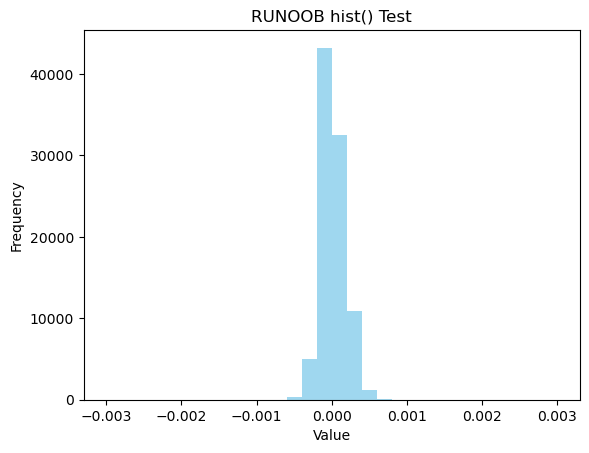

In [3]:
import matplotlib.pyplot as plt
import numpy as np

data = model.mask[model.mask<0.85]
# 生成一组随机数据
data = data.detach().numpy()

# 绘制直方图
plt.hist(data, bins=30,range=[-3e-3,3e-3], color='skyblue', alpha=0.8)

# 设置图表属性
plt.title('RUNOOB hist() Test')
plt.xlabel('Value')
plt.ylabel('Frequency')

# 显示图表
plt.show()



In [41]:
ckpt = torch.load('/root/autodl-tmp/fMRI/train_logs/test_2000_128/last.pth', map_location='cpu')

# large_linear_layer = ckpt['model_state_dict']['voxel2clip.lin0.0.weight']



# 假设 active_indices 是包含 2000 个有值位置的索引
ori_data=ckpt['model_state_dict']['voxel2clip.mask']
tiny_roi = ((ori_data)>0.5)
active_indices = tiny_roi.flatten()

# 提取大线性层的权重和偏置项
weight = ckpt['model_state_dict']['voxel2clip.lin0.0.weight']
bias = ckpt['model_state_dict']['voxel2clip.lin0.0.bias']

# 选择与 active_indices 对应的权重
selected_weight = weight[:, active_indices]
selected_weight = selected_weight*ori_data[tiny_roi]
# 创建新的线性层
small_linear_layer = nn.Linear(2000, 1024)

# 将提取的权重和偏置项赋给新的线性层
with torch.no_grad():
    small_linear_layer.weight = nn.Parameter(selected_weight)
    small_linear_layer.bias = nn.Parameter(bias)
    
# 保存成新的模型并进行测试
import models

model=models.fmriNet(trainable_roi=False)
model.load_state_dict(ckpt['model_state_dict'],strict=False)
model.lin0[0] = small_linear_layer

# [:,tiny_roi]

In [5]:

(selected_weight*ori_data[tiny_roi]).shape

torch.Size([1024, 1999])

# MindEYE2


In [3]:
import webdataset as wds
import random
import torch
train_url = '/root/autodl-tmp/NSD/mindeyev2_dataset/wds/subj01/train/{0..39}.tar'
train_data= wds.WebDataset(train_url,resampled=True)\
                    .shuffle(750, initial=1500, rng=random.Random(42))\
                    .decode("torch")\
                    .rename(behav="behav.npy", past_behav="past_behav.npy", future_behav="future_behav.npy", olds_behav="olds_behav.npy")\
                    .to_tuple(*["behav", "past_behav", "future_behav", "olds_behav"])
train_dl = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=False, drop_last=True, pin_memory=True)

In [1]:
for i ,v in enumerate(train_dl):
    print(v[0][0,0,0])
    print(v[0][0,0,5])
    break

NameError: name 'train_dl' is not defined

In [8]:
import torch
ckpt = torch.load('/root/autodl-tmp/fMRI/train_logs/subj5_session4_trainroi_3000/last.pth',map_location='cpu')
# print( ckpt['model_state_dict'].keys())
# print(weight.shape)
ori_data = ckpt['model_state_dict']['masks.0']

In [10]:
print((ori_data>0.5).sum())

tensor(2880)


In [4]:
print(ori_data.shape)

torch.Size([2048, 96000])


In [11]:
mask = ori_data>0.5

In [12]:
import numpy as np
np.save('/root/autodl-tmp/fMRI/train_logs/subj05_2880_4sess.npy',mask.detach().cpu().numpy())

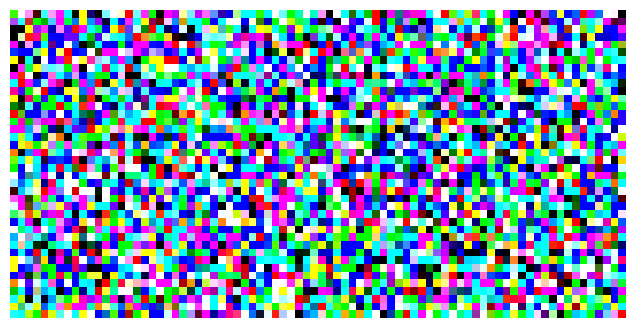

In [35]:
from PIL import Image

# 设置图片尺寸
width, height = 80, 40

# 创建纯蓝色图片
image = Image.new("RGB", (width, height), (51, 153, 255))


def add_random_noise(image, noise_level=10):
    """
    向图像添加随机噪声。
    
    参数:
    image (PIL.Image): 输入图像
    noise_level (int): 噪声强度，值越大噪声越明显
    
    返回:
    PIL.Image: 添加噪声后的图像
    """
    # 将图像转换为numpy数组
    np_image = np.array(image)
    
    # 生成随机噪声
    noise = np.random.randint(-noise_level, noise_level, np_image.shape, dtype='int16')
    
    # 将噪声添加到图像
    noisy_image = np_image + noise
    
    # 将结果限制在有效范围 [0, 255]
    noisy_image = np.clip(noisy_image, 0, 255).astype('uint8')
    
    # 将结果转换回PIL图像
    noisy_image = Image.fromarray(noisy_image)
    
    return noisy_image



# 添加随机噪声
noisy_image = add_random_noise(image, noise_level=500)

# 展示原图和加噪后的图像
plt.figure(figsize=(8, 4))

# plt.subplot(1, 2, 1)
# plt.title('Original Image')
# plt.imshow(image)
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.title('Noisy Image')
plt.imshow(noisy_image)
plt.axis('off')
plt.savefig('500.jpg', bbox_inches='tight', pad_inches=-0.1)
plt.show()



In [1]:
import torch
params = torch.load('/root/autodl-tmp/fMRI/train_logs/multisubject_subj1_session1_train_prior/last.pth')
print(params['model_state_dict'].keys())

odict_keys(['ridge.linears.0.0.weight', 'ridge.linears.0.0.bias', 'ridge.linears.0.1.weight', 'ridge.linears.0.1.bias', 'ridge.linears.0.3.weight', 'ridge.linears.0.3.bias', 'backbone.mixer_blocks1.0.0.weight', 'backbone.mixer_blocks1.0.0.bias', 'backbone.mixer_blocks1.0.1.0.weight', 'backbone.mixer_blocks1.0.1.0.bias', 'backbone.mixer_blocks1.0.1.3.weight', 'backbone.mixer_blocks1.0.1.3.bias', 'backbone.mixer_blocks1.1.0.weight', 'backbone.mixer_blocks1.1.0.bias', 'backbone.mixer_blocks1.1.1.0.weight', 'backbone.mixer_blocks1.1.1.0.bias', 'backbone.mixer_blocks1.1.1.3.weight', 'backbone.mixer_blocks1.1.1.3.bias', 'backbone.mixer_blocks1.2.0.weight', 'backbone.mixer_blocks1.2.0.bias', 'backbone.mixer_blocks1.2.1.0.weight', 'backbone.mixer_blocks1.2.1.0.bias', 'backbone.mixer_blocks1.2.1.3.weight', 'backbone.mixer_blocks1.2.1.3.bias', 'backbone.mixer_blocks1.3.0.weight', 'backbone.mixer_blocks1.3.0.bias', 'backbone.mixer_blocks1.3.1.0.weight', 'backbone.mixer_blocks1.3.1.0.bias', 'backb

In [2]:
print(params['model_state_dict']['ridge.linears.0.0.weight'].shape)

torch.Size([2048, 2961])


In [ ]:
# 取一个voxel，可视化看看
